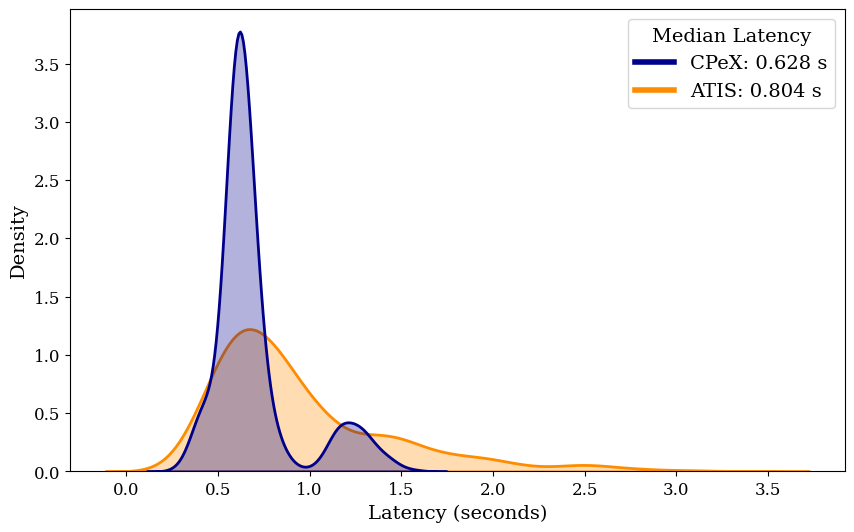

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl

# Set global font settings to serif for academic formatting
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 12  # Adjust to match academic text size

# Load the CSV file
df = pd.read_csv("../experiment-3.csv")

# Convert latency from milliseconds to seconds
df["latency"] = df["latency"] / 1000  # Convert ms to seconds
df["protocol"] = df["protocol"].str.lower()  # Convert to lowercase for better readability

# Define lighter colors for better visibility
color_palette = {"cpex": "darkblue", "atis": "darkorange"}  # Lighter blue and orange

# Create the KDE-based empirical PDF plot
plt.figure(figsize=(10, 6))

# Plot KDE for each protocol
for protocol in df["protocol"].unique():
    subset = df[df["protocol"] == protocol]["latency"]
    sns.kdeplot(subset, label=f"{protocol.upper()}", color=color_palette[protocol], 
                linewidth=2, fill=True, alpha=0.3)  # Fill adds transparency for better visibility

# Labels and title
# plt.title("Empirical Probability Density Function of Latency", fontsize=14, fontweight='bold')
plt.xlabel("Latency (seconds)", fontsize=14)
plt.ylabel("Density", fontsize=14)

median_values = df.groupby("protocol")["latency"].median()
handles = [
    plt.Line2D([0], [0], color="darkblue", lw=4, label=f"CPeX: {median_values['cpex']:.3f} s"),
    plt.Line2D([0], [0], color="darkorange", lw=4, label=f"ATIS: {median_values['atis']:.3f} s"),
]
plt.legend(handles=handles, title="Median Latency", title_fontsize="14", fontsize="14")

# Save as high-resolution PDF
pdf_path = "../charts/latency_epdf.pdf"
plt.savefig(pdf_path, format="pdf", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()
